<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [5]:
df=pd.read_csv('malaria.csv')
df

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df[df.isnull().sum(axis=1)==16].index

Int64Index([4, 21, 39, 99], dtype='int64')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df.columns[(df.isnull().sum()/len(df)*100 > 60)]

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.columns[:4]

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria'], dtype='object')

In [25]:
df_guinea = df[['Cases_Guinea', 'Deaths_Guinea']]
print("Null values in  Guinea are:",df_guinea.isnull().sum().sum())
df_liberia=df[['Cases_Liberia', 'Deaths_Liberia']]
print("Null values in liberia are:",df_liberia.isnull().sum().sum())
df_SierraLeone=df[['Cases_SierraLeone', 'Deaths_SierraLeone']]
print("Null values in SierraLeone are:",df_SierraLeone.isnull().sum().sum())
df_Nigeria=df[['Cases_Nigeria', 'Deaths_Nigeria']]
print("Null values in nijeria are:",df_Nigeria.isnull().sum().sum())

#nijeria is the highest null values ,so we take that first obesrvtions.

Null values in  Guinea are: 69
Null values in liberia are: 90
Null values in SierraLeone are: 80
Null values in nijeria are: 178


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

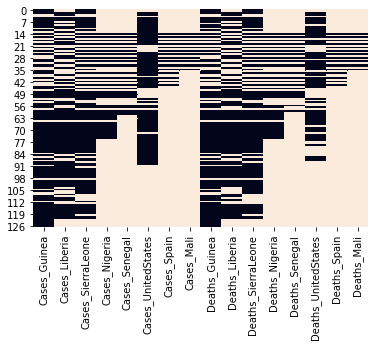

In [24]:
sns.heatmap(df.isnull(),cbar=False)

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
df.dropna(axis=0,thresh=2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.columns[df.isnull().sum()/df.shape[0]*100>70]

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [29]:
df.drop(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],axis=1)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
df['Cases_Liberia'].skew()

0.9491336030709361

<AxesSubplot:xlabel='Cases_Liberia'>

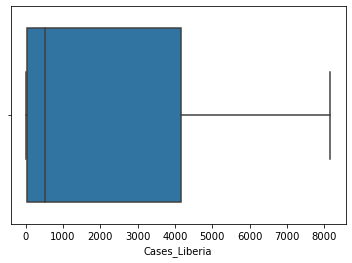

In [33]:
sns.boxplot(df['Cases_Liberia'])

In [40]:
df['Cases_Liberia']=df['Cases_Liberia'].fillna(df['Cases_Liberia'].mean())
df['Cases_Liberia'].isnull().sum()



0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
df['Cases_UnitedStates'].skew()

0.4685235032170701

<AxesSubplot:xlabel='Cases_UnitedStates'>

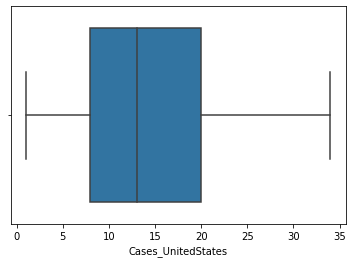

In [42]:
sns.boxplot(df['Cases_UnitedStates'])

In [43]:
df['Cases_UnitedStates']=df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].mean())
df['Cases_UnitedStates'].isnull().sum()


0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
print(df['Cases_Guinea'].skew())  ## Both are right skewed. So,need to replace with median 
print(df['Deaths_Guinea'].skew())

1.0023009483886705
1.1088793090392497


In [45]:
df.Cases_Guinea.fillna(df['Cases_Guinea'].median())
df.Deaths_Guinea.fillna(df['Deaths_Guinea'].median())

0      1786.0
1      1781.0
2      1767.0
3       360.5
4       360.5
        ...  
122      66.0
123      62.0
124      60.0
125      59.0
126      29.0
Name: Deaths_Guinea, Length: 127, dtype: float64

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [4]:
df2=pd.read_csv('house.csv')
df2

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

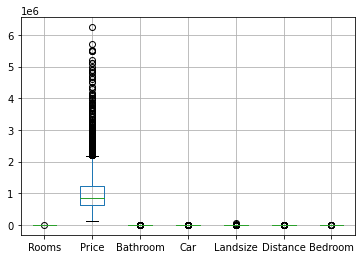

In [47]:
df2.boxplot()

<AxesSubplot:>

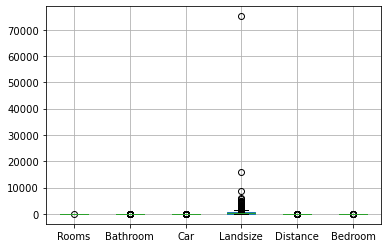

In [55]:
df2.loc[:,df2.columns!='Price'].boxplot()

<AxesSubplot:>

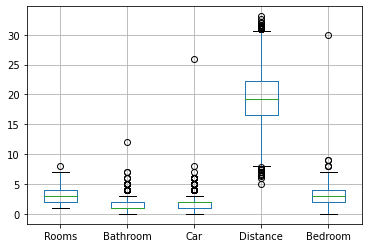

In [57]:
df2.drop(['Price','Landsize'],axis=1).boxplot()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
q1=np.quantile(df2['Car'],0.25)
q3=np.quantile(df2['Car'],0.75)
iqr= q3-q1
iqr

1.0

In [68]:
ub=q3+1.5*iqr
lb=q1-1.5*iqr

(df2['Car'][(df2['Car']>ub) | (df2['Car']<lb)]).unique()


array([ 5,  4,  6,  7, 26,  8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
df2.loc[:,['Type','Price']]

,Type,Price
0,h,1490000
1,h,1220000
2,h,1420000
3,h,1515000
4,h,670000
...,...,...
4761,h,1150000
4762,h,712000
4763,h,800000
4764,u,747000


<AxesSubplot:xlabel='Type', ylabel='Price'>

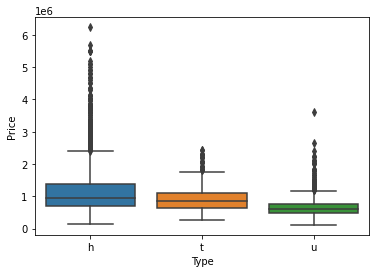

In [72]:
sns.boxplot(df2['Type'],df2['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
from scipy.stats import zscore
df2['Rooms'][(zscore(df2['Rooms'])>3)].unique()

array([7, 6, 8], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
#we use zsocre/iqr method 

array([ 7,  4,  5,  6, 12], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [80]:
Q1 = np.quantile(df2['Bedroom'],0.25)
Q3 = np.quantile(df2['Bedroom'],0.75)

IQR = Q3-Q1
UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

(df2[(df2['Bedroom']>UB) | (df2['Bedroom']<LB)])


,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
df2['Distance'].mean()

19.32834662190515

In [104]:
Q1 = np.quantile(df2['Distance'],0.25)
Q3 = np.quantile(df2['Distance'],0.75)

IQR = Q3-Q1
UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

(df2[(df2['Distance']>UB) | (df2['Distance']<LB)])


df4=df2[(df2['Distance']<=UB) & (df2['Distance']>=LB)]

In [105]:
df4[['Distance']].mean()

Distance    19.311426
dtype: float64

In [106]:
df2['Distance'].mean()-df4[['Distance']].mean()

Distance    0.016921
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

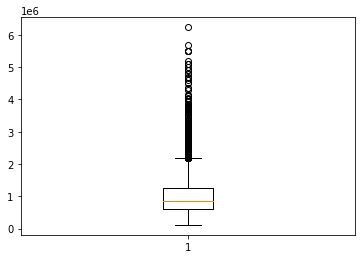

In [90]:
plt.boxplot(df2['Price'])
plt.show()

2


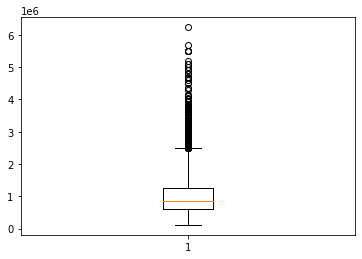

3


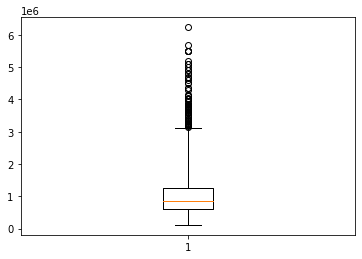

4


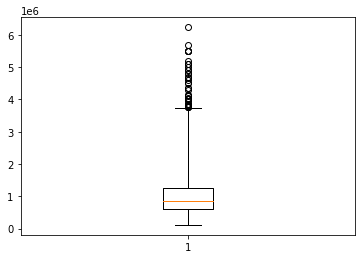

5


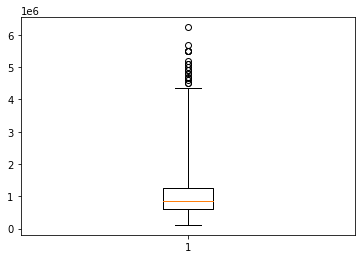

6


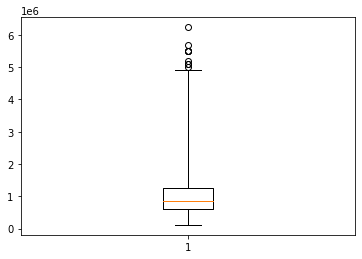

7


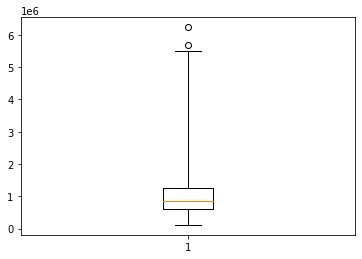

8


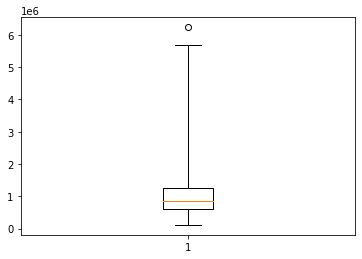

9


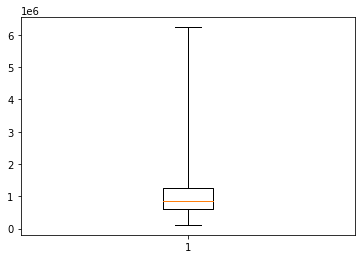

10


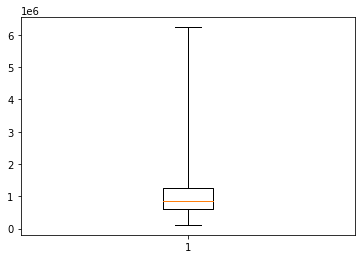

In [93]:
for i in range(2, 11):
    print(i)
    plt.boxplot(df2['Price'], whis=i)
    plt.show()

#whish =9 to eleminate all the outlaiers

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
df2['distance_group']=pd.cut(df2['Distance'], bins=3)
df2

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,distance_group
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,"(23.733, 33.1]"
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,"(14.367, 23.733]"
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,"(14.367, 23.733]"
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,"(14.367, 23.733]"
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,"(14.367, 23.733]"
...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,"(14.367, 23.733]"
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,"(14.367, 23.733]"
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,"(23.733, 33.1]"
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,"(14.367, 23.733]"


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='distance_group', ylabel='Price'>

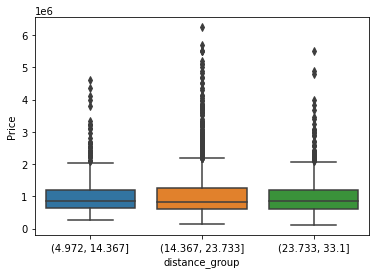

In [108]:
sns.boxplot(df2['distance_group'],df2['Price'])

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
from sklearn.model_selection import train_test_split
train_price,test_price=train_test_split(df2['Price'],train_size=0.80)

In [101]:
train_price.shape,test_price.shape

((3812,), (954,))